# K-Means exploratory analysis
# Author: Prabhat Singh

## Objective: to see how price of listings clusters with other variables such as size, quality and occupancy

In [35]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
np.set_printoptions(precision=3)
from sklearn.cluster import KMeans
from sklearn.model_selection import KFold
from scipy.spatial.distance import cdist, pdist

from sklearn.preprocessing import scale
from matplotlib import cm
from sklearn import datasets, linear_model
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

## Read data and preprocess

In [36]:
path = "C:\\Users\\adminuser\\Documents\\GitHub\\airbnb-price-recommendations\\Data\\"
train_df = pd.read_csv(path + "train.csv")
test_df = pd.read_csv(path + "test.csv")

In [37]:
#Combine train and test sets into a single set 
total_df = train_df.append(test_df)

In [38]:
# choose the most significant numeric columns
total_df_numeric = total_df[['bedrooms', 'price', 'number_of_reviews', 'review_scores_rating', 'guests_included']]

In [39]:
# scale train and test data
colnames = list(total_df_numeric)
total_df_numeric_scaled = pd.DataFrame()
for name in colnames:
    total_df_numeric_scaled[name] = ((total_df_numeric[name] - total_df_numeric[name].min())/(total_df_numeric[name].max() - total_df_numeric[name].min()))

## Calculating centroids and labels
### 8 clusters have been chosen, which explain 82% variance

In [40]:
centroids = []
labels = []

kmeans = KMeans(n_clusters = 8, n_init=100, max_iter=300, tol=0.0001, verbose=0, random_state = 13511).fit(total_df_numeric_scaled)
centroids.append(kmeans.cluster_centers_)
labels.append(kmeans.labels_)

In [41]:
print("\nThe train cluster sizes are", np.bincount(labels[0]))
print("The cluster proportions are", np.bincount(labels[0])/len(labels[0]))


The train cluster sizes are [ 1746  3150  2520  6486  2412   389 10623   942]
The cluster proportions are [0.062 0.111 0.089 0.229 0.085 0.014 0.376 0.033]


## Unscale centroids to interpret clusters

In [42]:
unscaled_centroids = centroids

In [43]:
for i in range (0,1):
    for j in range (0,8):
        for k in range(0,5):
            unscaled_centroids[i][j][k] = centroids[i][j][k]*(total_df_numeric.iloc[:, k].max() - total_df_numeric.iloc[:, k].min()) + total_df_numeric.iloc[:, k].min()

In [44]:
unscaled_centroids_df = pd.DataFrame(unscaled_centroids[0], columns=['bedrooms', 'price', 'number_of_reviews', 'review_scores_rating', 'guests_included'])

## Clusters are below

In [45]:
unscaled_centroids_df

,bedrooms,price,number_of_reviews,review_scores_rating,guests_included
0,2.171821,175.678694,47.050974,94.125430,4.742841
1,1.005716,81.093681,21.305176,83.777390,1.312480
2,1.521825,266.807937,27.514286,95.437698,1.746825
3,1.058733,156.791275,24.149067,96.438261,1.410822
4,1.075041,102.194444,182.436567,94.464760,1.590381
5,1.125964,102.359897,2.169666,48.796915,1.395887
6,0.999435,69.489504,27.082651,96.720324,1.217735
7,2.376858,409.100849,28.506369,95.078556,3.305732


## Means of each column have been calculated to allow interpretation of clusters listed above 

In [46]:
unscaled_centroids_df.mean()

bedrooms                  1.416924
price                   170.439535
number_of_reviews        45.026845
review_scores_rating     88.104917
guests_included           2.090338
dtype: float64

### Difference in centroid prices across the 8 clusters 

<IPython.core.display.Javascript object>


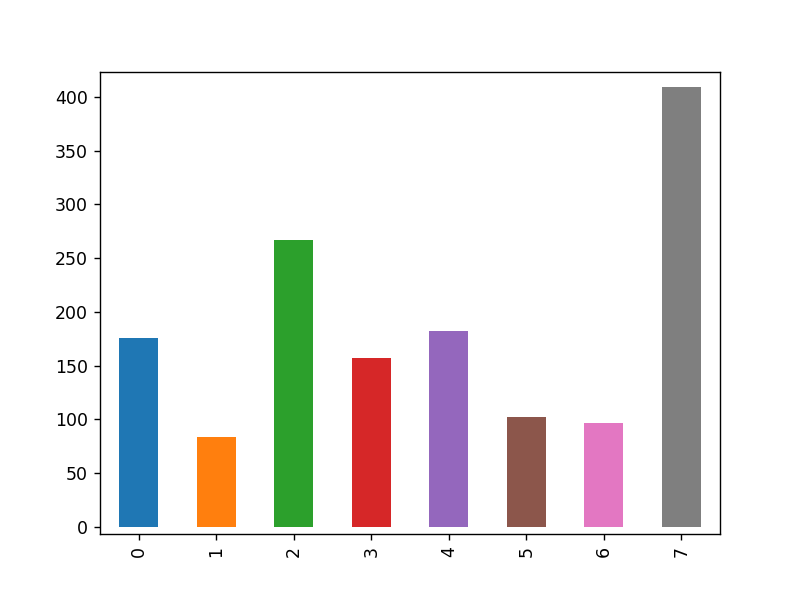

In [47]:
ax = unscaled_centroids_df['price'].plot.bar()

## 3-D plot showing price, rating and number of reviews  

<IPython.core.display.Javascript object>


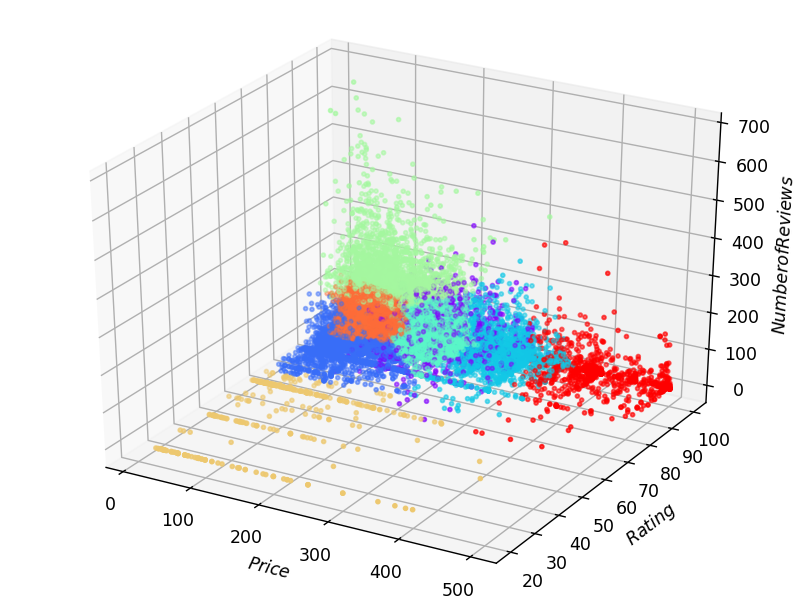

In [61]:
fig = pyplot.figure()
dx = Axes3D(fig)
dx.scatter(total_df_numeric.price, total_df_numeric.review_scores_rating, total_df_numeric.number_of_reviews, c = labels[0], s = 5, cmap = 'rainbow', label = labels[0])

dx.set_xlabel('$Price$')
dx.set_ylabel('$Rating$')
dx.set_zlabel('$Number of Reviews$')

pyplot.show()